In [1]:
# importing important libraries
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.metrics import AUC, Precision, Recall
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# loading dataset and cleaning
raw_data = pd.read_csv('dcom/signal_data.csv')
data = raw_data[ abs(raw_data['input_data'] - raw_data['output_data']) <= 10]
data.to_csv('dcom/signal_data_updated.csv')
data.shape

(10621, 11)

In [3]:
data.head()

,Unnamed: 0,input_data,output_data,received_data_real,received_data_imag,transmitted_data_real,transmitted_data_imag,encoded_data_real,encoded_data_imag,decoded_data_real,decoded_data_imag
0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27,27,250,247,0.663894,-0.013224,0.361498,0.370355,-1.414214,-1.414214,1.414214,1.414214
63,63,106,107,0.827796,0.371415,-0.148441,0.622365,-1.414214,-1.414214,1.414214,-1.414214
66,66,199,208,0.361152,-0.112456,-0.569406,0.648922,1.414214,1.414214,1.414214,1.414214
80,80,39,49,-0.418070,0.866829,0.021619,-0.094309,-1.414214,-1.414214,-1.414214,-1.414214


In [4]:
# splitting data into X and y and pre-processing
X = data[['input_data',
          'received_data_real',
          'received_data_imag',
          'transmitted_data_real',
          'transmitted_data_imag',
          'encoded_data_real',
          'encoded_data_imag',
          'decoded_data_real',
         'decoded_data_imag']]

X_ = data[['received_data_real',
           'received_data_imag',
           'decoded_data_real',
           'decoded_data_imag']]

X['input_data'] /= 255
y = data['output_data']/255


C:\Users\Kaustubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
X.head()

,input_data,received_data_real,received_data_imag,transmitted_data_real,transmitted_data_imag,encoded_data_real,encoded_data_imag,decoded_data_real,decoded_data_imag
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
27,0.980392,0.663894,-0.013224,0.361498,0.370355,-1.414214,-1.414214,1.414214,1.414214
63,0.415686,0.827796,0.371415,-0.148441,0.622365,-1.414214,-1.414214,1.414214,-1.414214
66,0.780392,0.361152,-0.112456,-0.569406,0.648922,1.414214,1.414214,1.414214,1.414214
80,0.152941,-0.418070,0.866829,0.021619,-0.094309,-1.414214,-1.414214,-1.414214,-1.414214


In [6]:
X_.head()

,received_data_real,received_data_imag,decoded_data_real,decoded_data_imag
0,0.000000,0.000000,0.000000,0.000000
27,0.663894,-0.013224,1.414214,1.414214
63,0.827796,0.371415,1.414214,-1.414214
66,0.361152,-0.112456,1.414214,1.414214
80,-0.418070,0.866829,-1.414214,-1.414214


In [7]:
y.head()

0     0.000000
27    0.968627
63    0.419608
66    0.815686
80    0.192157
Name: output_data, dtype: float64

In [8]:
def decimalToBinary(n):  
    return bin(n).replace("0b", "") 

In [ ]:
count = 0
for i in range(0,8):  
    if ((( A >>  i) & 1) != (( B >>  i) & 1)):  
        count = count + 1
print(count)

In [9]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [10]:
#Creating the model : Logistic Regression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
# printing co-efficients of linear regression
m = lr.coef_
print("Coefficients of the model : ",m)

Coefficients of the model :  [ 9.55971740e-01 -3.79610642e-04  3.83483154e-04  6.21833094e-05
 -1.31868470e-03  1.21150828e-03 -1.81323616e-04  4.79478938e-03
  7.32862371e-03]


In [12]:
#intercept of the model
c = lr.intercept_
print("Intercept : ", c)

Intercept :  0.023117319703747197


In [13]:
# Prediction of a value
pred_value = lr.predict([X_test.iloc[0]])
print("Predicted Value : ", pred_value*255)
print("Input Signal : ", X_test.iloc[0].input_data*255)

Predicted Value :  [119.03105096]
Input Signal :  120.0


In [14]:
# score of the model
acc_lr = 100 * lr.score(X_test,y_test)
print("Model Score : {:.3f} %".format(acc_lr))

Model Score : 99.283 %


In [15]:
# saving the model
joblib_file = "dcom/input_linear_model.pkl"  
joblib.dump(lr, joblib_file)

# reload the file
# joblib_LR_model = joblib.load(joblib_file)

['dcom/input_linear_model.pkl']

In [ ]:
scalex = StandardScaler()
scaley = StandardScaler()
X_ = scalex.fit_transform(X_)
y = np.array(data['output_data'])
y = y.reshape(-1, 1)
y = scaley.fit_transform(y)

In [16]:
# Splitting the data
X_train,X_test,y_train,y_test = train_test_split(X_, y, test_size=0.2, random_state=1)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

# Building the DNN model
model = Sequential()
model.add(Dense(units = 4, activation = 'relu', input_dim = 4))
model.add(Dense(units = 4,  activation = 'relu'))
model.add(Dense(units = 1,  activation = 'linear'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(X_train, y_train,validation_split=0.125, batch_size = 10, epochs = 25)

Epoch 1/25
744/744 [==============================] - 1s 900us/step - loss: 0.1133 - mse: 0.1133 - mae: 0.2517 - val_loss: 0.0190 - val_mse: 0.0190 - val_mae: 0.1089
Epoch 2/25
744/744 [==============================] - 1s 788us/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0880 - val_loss: 0.0099 - val_mse: 0.0099 - val_mae: 0.0751
Epoch 3/25
744/744 [==============================] - 1s 753us/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0741 - val_loss: 0.0088 - val_mse: 0.0088 - val_mae: 0.0696
Epoch 4/25
744/744 [==============================] - 1s 788us/step - loss: 0.0110 - mse: 0.0110 - mae: 0.0715 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0685
Epoch 5/25
744/744 [==============================] - 0s 643us/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0709 - val_loss: 0.0085 - val_mse: 0.0085 - val_mae: 0.0683
Epoch 6/25
744/744 [==============================] - 1s 744us/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0708 - val_loss: 0.0088 - val_mse: 0.0088 - val_mae: 0.0691
Epoc

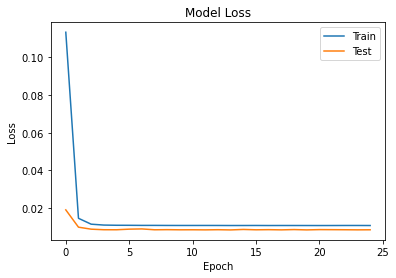

In [20]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

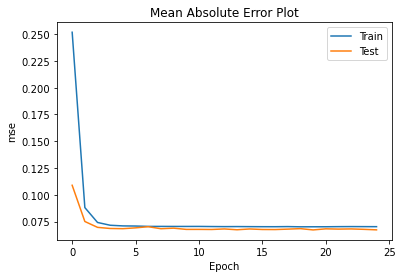

In [21]:
# summarize history for mae 
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Mean Absolute Error Plot')
plt.ylabel('mse')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [22]:
#scores of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(scores)

[0.008557165041565895, 0.008557165041565895, 0.06812842935323715]


In [33]:
# predict new values
X_test = np.array(X_test)
new_inp = X_test[0].reshape(1,-1)
value = model.predict(new_inp) * 255
print("Output values is : ", value)

Output values is :  [[108.28809]]


In [35]:
model.save('dcom/dnn_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dcom/dnn_model\assets


In [36]:
# bulding a decision tree regressor
lr_ = LinearRegression()
lr_.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
# Prediction of a value
pred_value = lr_.predict(X_test[0].reshape(1,-1))
print("Predicted Value : ", pred_value * 255)

Predicted Value :  [105.13283747]


In [44]:
# score of the model
acc_lr = 100 * lr_.score(X_test,y_test)
print("Model Score : {:.3f} %".format(acc_lr))

Model Score : 88.316 %


In [45]:
# saving the model
joblib_file = "dcom/output_linear_model.pkl"  
joblib.dump(lr_, joblib_file)

# reload the file
# joblib_LR_model = joblib.load(joblib_file)

['dcom/output_linear_model.pkl']